## Exam MB120

#### Import libraries

In [1023]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor

#import numpy as np
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense

In [1024]:
#Suppress warnins to retain anonymity
import warnings
warnings.filterwarnings('ignore')

### Download data

In [1025]:
#Downloading daily XOM stock-data from yfinaince from starting data 2008-01-01
ticker = ['XOM']
interval = "1d"
start_date = "2008-01-01"

gas_companie = yf.download(ticker, interval=interval, start=start_date, end=datetime.today() - timedelta(days=1))

df_stock_gas = pd.DataFrame(gas_companie)
df_stock_gas = df_stock_gas.reset_index()
df_stock_gas = df_stock_gas.rename(columns={'index': 'Date'})

#Printing dataset characteristics
print(f"""
First rows of Original Dataset XOM
------------------------
{df_stock_gas.tail()}
""")

[*********************100%***********************]  1 of 1 completed

First rows of Original Dataset XOM
------------------------
           Date        Open        High         Low       Close   Adj Close  \
3864 2023-05-09  108.339996  110.230003  108.209999  109.139999  108.201096   
3865 2023-05-10  109.739998  110.010002  106.709999  107.739998  106.813141   
3866 2023-05-11  106.489998  106.820000  104.930000  105.790001  104.879921   
3867 2023-05-12  106.309998  107.010002  104.779999  105.779999  104.870003   
3868 2023-05-15  105.510002  105.930000  104.580002  105.070000  105.070000   

        Volume  
3864  11370800  
3865  14884800  
3866  17165900  
3867  12608300  
3868  13706200  



In [1027]:
#Downloading daily CSIQ stock-data from yfinaince from starting data 2008-01-01
ticker = ['CSIQ']
re_companies = yf.download(ticker, interval=interval, start=start_date, end=datetime.today() - timedelta(days=1))

df_stock_re = pd.DataFrame(re_companies)
df_stock_re = df_stock_re.reset_index()
df_stock_re = df_stock_re.rename(columns={'index': 'Date'})


#Printing dataset characteristics
print(f"""
First rows of Original Dataset CSIQ
------------------------
{df_stock_re.tail()}
""")

[*********************100%***********************]  1 of 1 completed

First rows of Original Dataset CSIQ
------------------------
           Date       Open       High        Low      Close  Adj Close  \
3864 2023-05-09  36.500000  36.549999  35.700001  36.060001  36.060001   
3865 2023-05-10  36.759998  36.770000  36.139999  36.570000  36.570000   
3866 2023-05-11  36.270000  37.070000  36.110001  36.799999  36.799999   
3867 2023-05-12  37.169998  37.799999  35.669998  36.009998  36.009998   
3868 2023-05-15  36.160000  36.310001  34.759998  35.360001  35.360001   

       Volume  
3864   576100  
3865   339300  
3866   380900  
3867  1513300  
3868  1910500  



### Data investigation 

In [1028]:
#Printing datatypes
print(f"""
Datatypes in Original Dataset XOM
------------------------
{df_stock_gas.dtypes}
""")

#Printing size/shape of dataset
print(f"""
Size of Original Dataset XOM
------------------------
Observations: {df_stock_gas.shape[0]}
Features:     {df_stock_gas.shape[1]}
""")

#Checking for Nan-values
print(f"""
Check for Nan-values in Original Dataset XOM
------------------------
{df_stock_gas.isna().sum()}
""")


Datatypes in Original Dataset XOM
------------------------
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


Size of Original Dataset XOM
------------------------
Observations: 3869
Features:     7


Check for Nan-values in Original Dataset XOM
------------------------
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



In [1029]:
#Printing datatypes
print(f"""
Datatypes in Original Dataset CSIQ
------------------------
{df_stock_re.dtypes}
""")

#Printing size/shape of dataset
print(f"""
Size of Original Dataset CSIQ
------------------------
Observations: {df_stock_re.shape[0]}
Features:     {df_stock_re.shape[1]}
""")

#Checking for NaN-values
print(f"""
Check for Nan-values in Original Dataset XOM
------------------------
{df_stock_re.isna().sum()}
""")


Datatypes in Original Dataset CSIQ
------------------------
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


Size of Original Dataset CSIQ
------------------------
Observations: 3869
Features:     7


Check for Nan-values in Original Dataset XOM
------------------------
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



#### Printing summary statistics

In [1030]:
#Printing median
print(f"""
Median of Close in XOM
------------------------
{round(df_stock_gas['Close'].median(), 3)}
""")

#Printing mean
print(f"""
Mean of Close in XOM
------------------------
{round(df_stock_gas['Close'].mean(), 3)}
""")

#Printing standard deviation 
print(f"""
Standard Deviation of Close in XOM
------------------------
{round(df_stock_gas['Close'].std(), 3)}
""")


Median of Close in XOM
------------------------
81.38


Mean of Close in XOM
------------------------
78.869


Standard Deviation of Close in XOM
------------------------
15.241



In [1031]:
#Printing median
print(f"""
Median of Close in CSIQ
------------------------
{round(df_stock_re['Close'].median(), 3)}
""")

#Printing mean
print(f"""
Mean of Close in CSIQ
------------------------
{round(df_stock_re['Close'].mean(), 3)}
""")

#Printing standard deviation 
print(f"""
Standard Deviation of Close in CSIQ
------------------------
{round(df_stock_re['Close'].std(), 3)}
""")


Median of Close in CSIQ
------------------------
18.07


Mean of Close in CSIQ
------------------------
20.553


Standard Deviation of Close in CSIQ
------------------------
11.824



#### Plot data

<AxesSubplot:title={'center':'Plot of Close-price over time CSIQ ticker'}, xlabel='Date'>

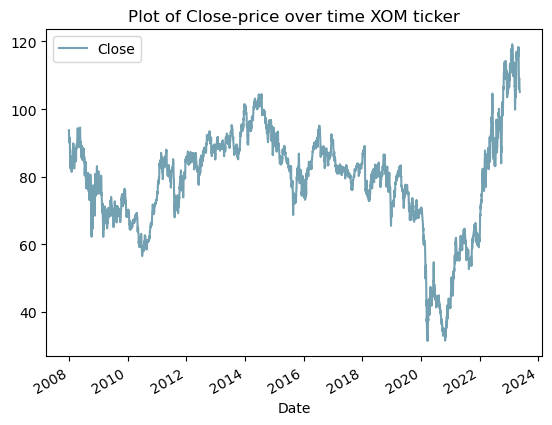

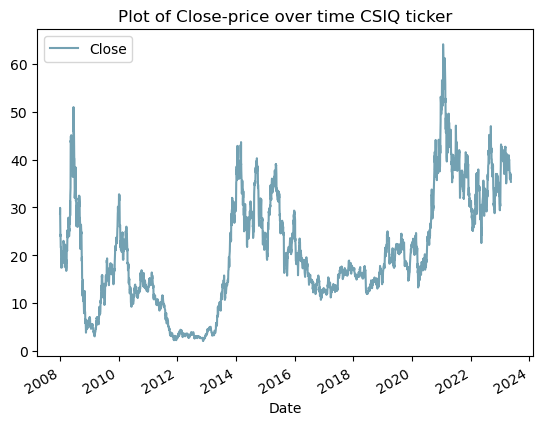

In [1032]:
#Plot Close-values over time
df_stock_gas.plot(x='Date', y='Close', title='Plot of Close-price over time XOM ticker', color='#73A1B2')
df_stock_re.plot(x='Date', y='Close', title='Plot of Close-price over time CSIQ ticker', color='#73A1B2')

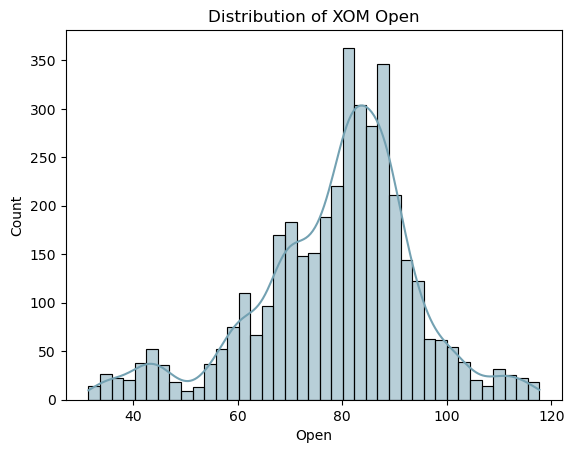

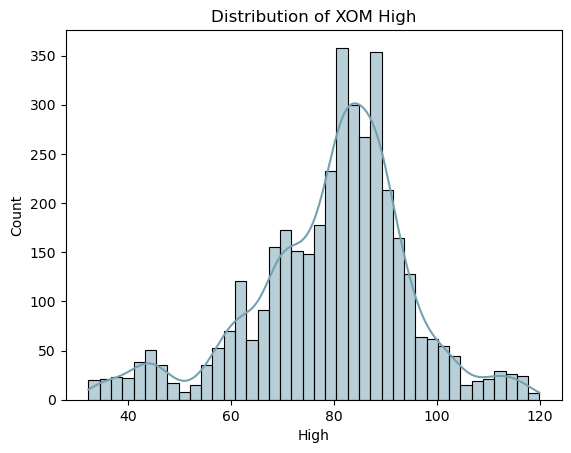

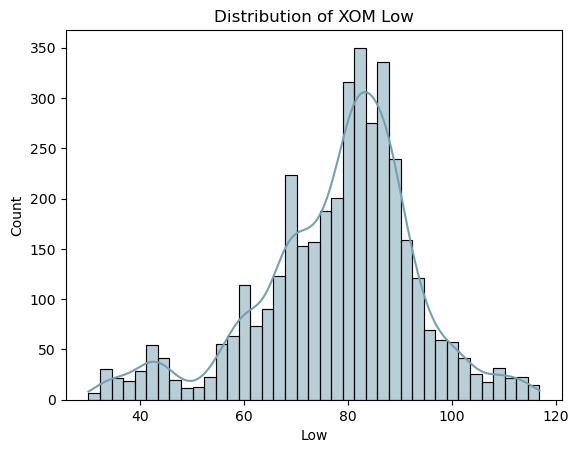

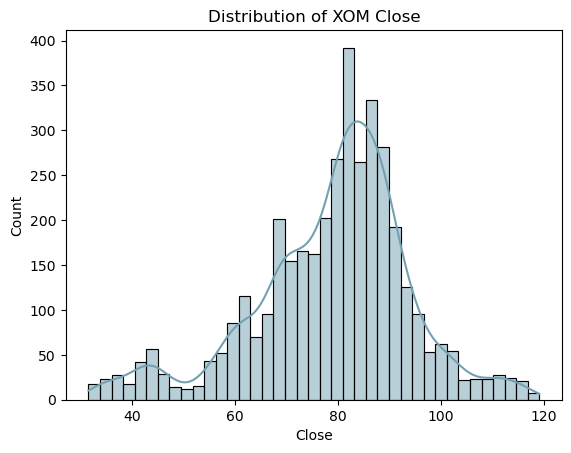

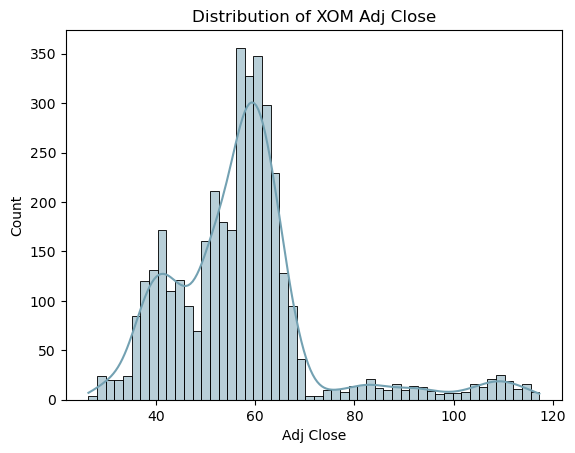

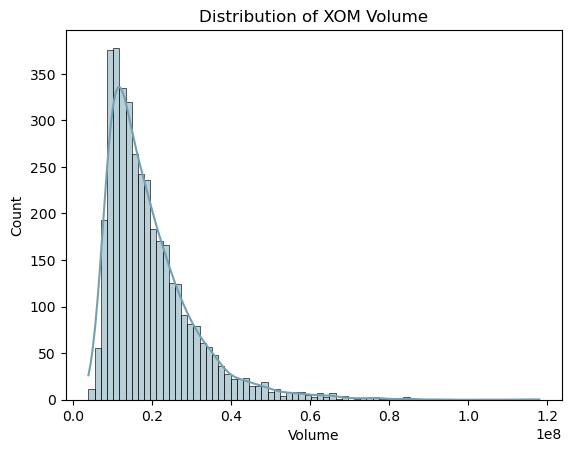

In [1033]:
#Define list of columns
continuous_data = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#Show distribution of chosen columns
for column in df_stock_gas:
    if column in continuous_data:
        sns.histplot(data=df_stock_gas, x=column, kde=True, color='#73A1B2')
        plt.title(f"Distribution of XOM {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

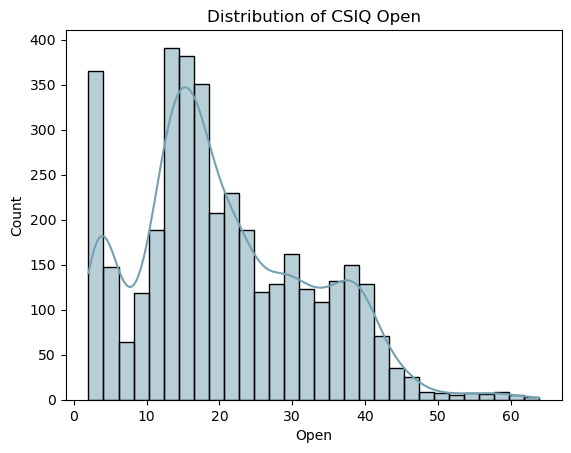

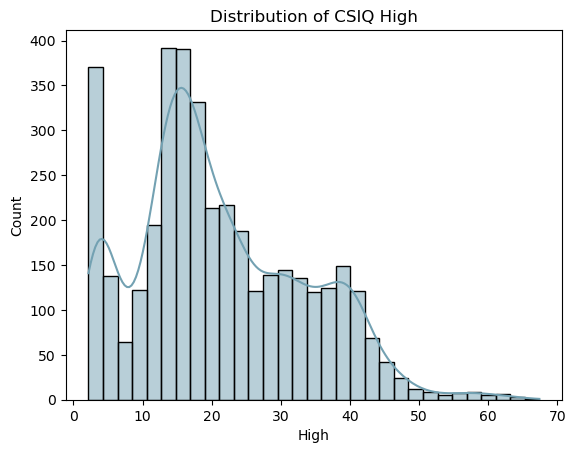

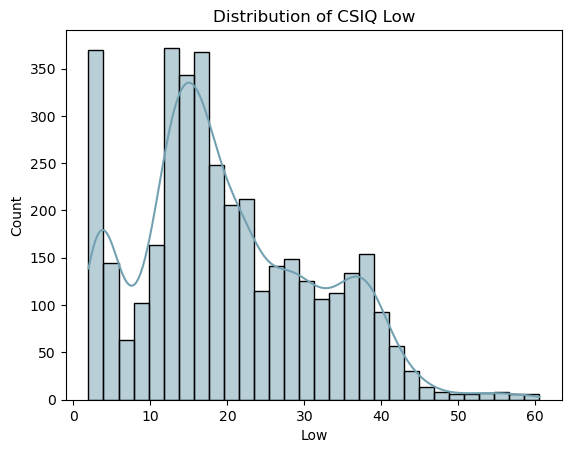

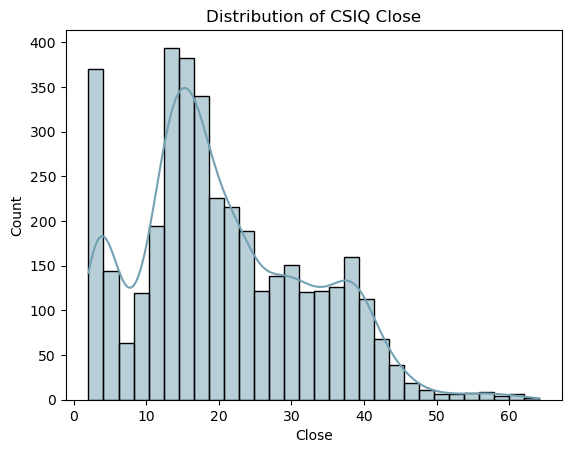

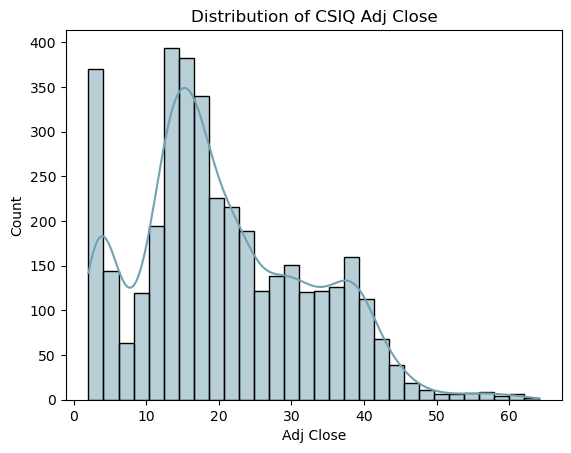

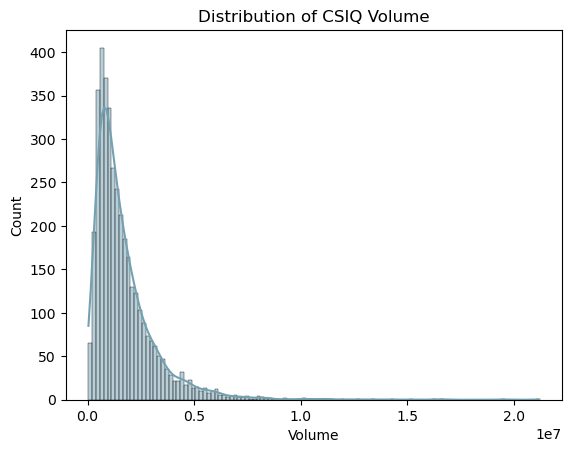

In [1034]:
#Show distribution of chosen columns
for column in df_stock_re:
    if column in continuous_data:
        sns.histplot(data=df_stock_re, x=column, kde=True, color='#73A1B2')
        plt.title(f"Distribution of CSIQ {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()


### Feature engineering

#### Percent change and volatility

In [1035]:
#Function to calculate percent change and volatility 
def calculate_pct_vol (df, column_name):
    df['Percent_change'] = df[column_name].pct_change()
    df['Volatility'] = df['Percent_change'].rolling(15).std()
    return df['Percent_change'], df['Volatility']

#Make columns for percent change and volatility and add values by calling function 
df_stock_gas['Percent_change'], df_stock_gas['Volatility'] = calculate_pct_vol(df_stock_gas, 'Close')
df_stock_re['Percent_change'], df_stock_re['Volatility'] = calculate_pct_vol(df_stock_re, 'Close')

#### Moving averages

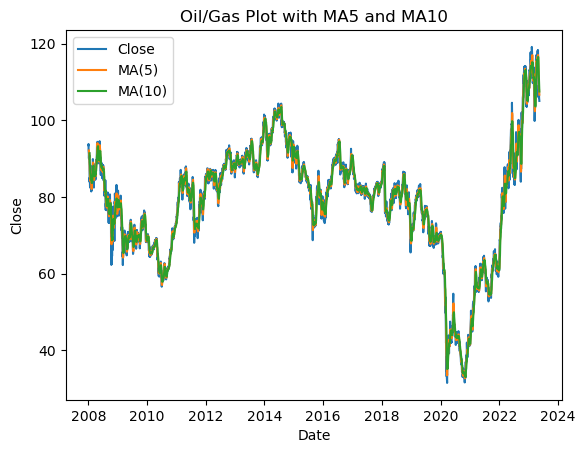

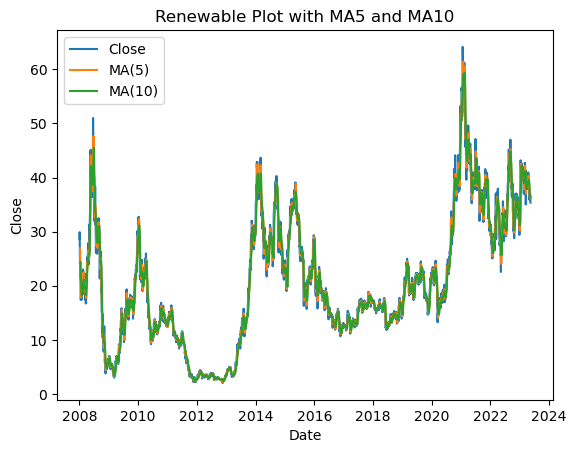

In [1036]:
#Function for adding moving averages to dataframe, and plot these averages
def moving_averages(df, stock_name, ma_period1, ma_period2):
    df[f'MA{ma_period1}'] = df['Close'].rolling(ma_period1).mean()
    df[f'MA{ma_period2}'] = df['Close'].rolling(ma_period2).mean()

    fig, ax = plt.subplots()
    ax.plot(df['Date'], df['Close'], label='Close')
    ax.plot(df['Date'], df[f'MA{ma_period1}'], label=f'MA({ma_period1})')
    ax.plot(df['Date'], df[f'MA{ma_period2}'], label=f'MA({ma_period2})')
    ax.legend()
    ax.set(title=f'{stock_name} Plot with MA{ma_period1} and MA{ma_period2}',
           xlabel='Date', ylabel='Close')
    plt.show()

#Call function 
moving_averages(df_stock_gas, "Oil/Gas", 5, 10)
moving_averages(df_stock_re, "Renewable", 5, 10)

#### RSI

In [1037]:
#Function to calculate RSI
def calculate_RSI(close, time_period=14):
    delta = close.diff()
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    avg_gain = gains.rolling(window=time_period, min_periods=time_period).mean()
    avg_loss = losses.rolling(window=time_period, min_periods=time_period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

#Make columns rsi and add values by calling function 
df_stock_gas['RSI'] = calculate_RSI(df_stock_gas['Close'])
df_stock_re['RSI'] = calculate_RSI(df_stock_re['Close'])

#### MACD

In [1038]:
#Function to calculate MACD
def calculate_MACD(close, fast_period=12, slow_period=26):
    ema_fast = close.ewm(span=fast_period, adjust=False).mean()
    ema_slow = close.ewm(span=slow_period, adjust=False).mean()

    macd = ema_fast - ema_slow

    return macd

#Make columns for MACD and add values by calling function 
df_stock_gas['MACD'] = calculate_MACD(df_stock_gas['Close'])
df_stock_re['MACD'] = calculate_MACD(df_stock_re['Close'])

#### Bollinger Bands

In [1039]:
#Function for calculation of Bollinger Bands
def calculate_bollinger_bands(close, time_period=20, num_std_dev=2):
    sma = close.rolling(window=time_period, min_periods=time_period).mean()
    std_dev = close.rolling(window=time_period, min_periods=time_period).std()

    upper_band = sma + (num_std_dev * std_dev)
    lower_band = sma - (num_std_dev * std_dev)

    return upper_band, lower_band

#Make columns for upper band and lower band and add values by calling function 
df_stock_gas['BB_Upper'], df_stock_gas['BB_Lower'] = calculate_bollinger_bands(df_stock_gas['Close'])
df_stock_re['BB_Upper'], df_stock_re['BB_Lower'] = calculate_bollinger_bands(df_stock_re['Close'])

#### EMA

In [1040]:
#Function for calculation of EMA
def calculate_ema(close, period):
    return close.ewm(span=period, adjust=False).mean()

#Make columns for EMA and add values by calling function 
df_stock_gas['EMA20'] = calculate_ema(df_stock_gas['Close'], 20)
df_stock_re['EMA20'] = calculate_ema(df_stock_re['Close'], 20)

##### Delete rows with NaN and reset index

In [1041]:
#Delete rows cantaining NaN-values
df_stock_gas = df_stock_gas.drop(index=range(19))
df_stock_re = df_stock_re.drop(index=range(19))

#Reset index after deleting rows 
df_stock_gas = df_stock_gas.reset_index(drop=True)
df_stock_re = df_stock_re.reset_index(drop=True)

#### Plot heatmap of feature-correlation

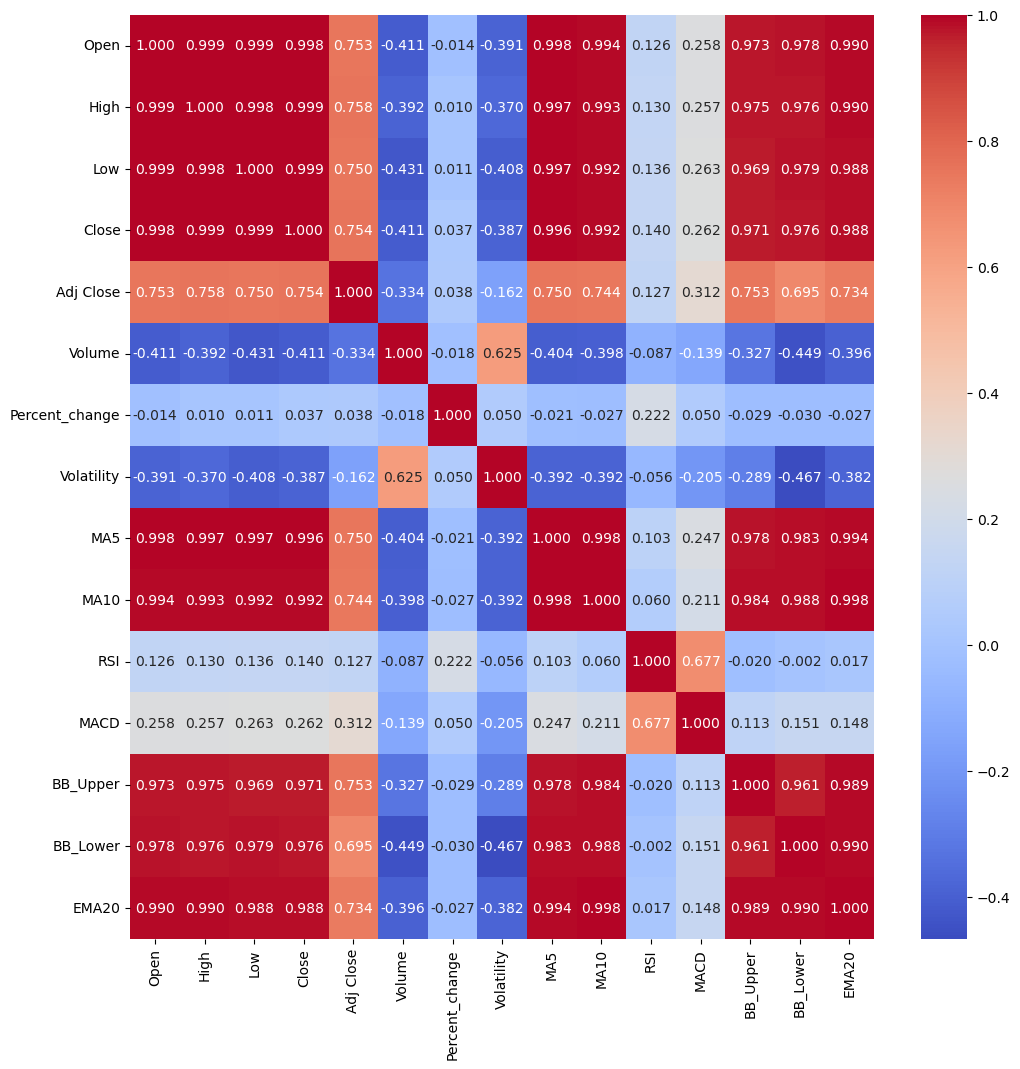

In [1043]:
#Make a correlatin matrix
corr_matrix = df_stock_gas.corr()

#Plot matrix as heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

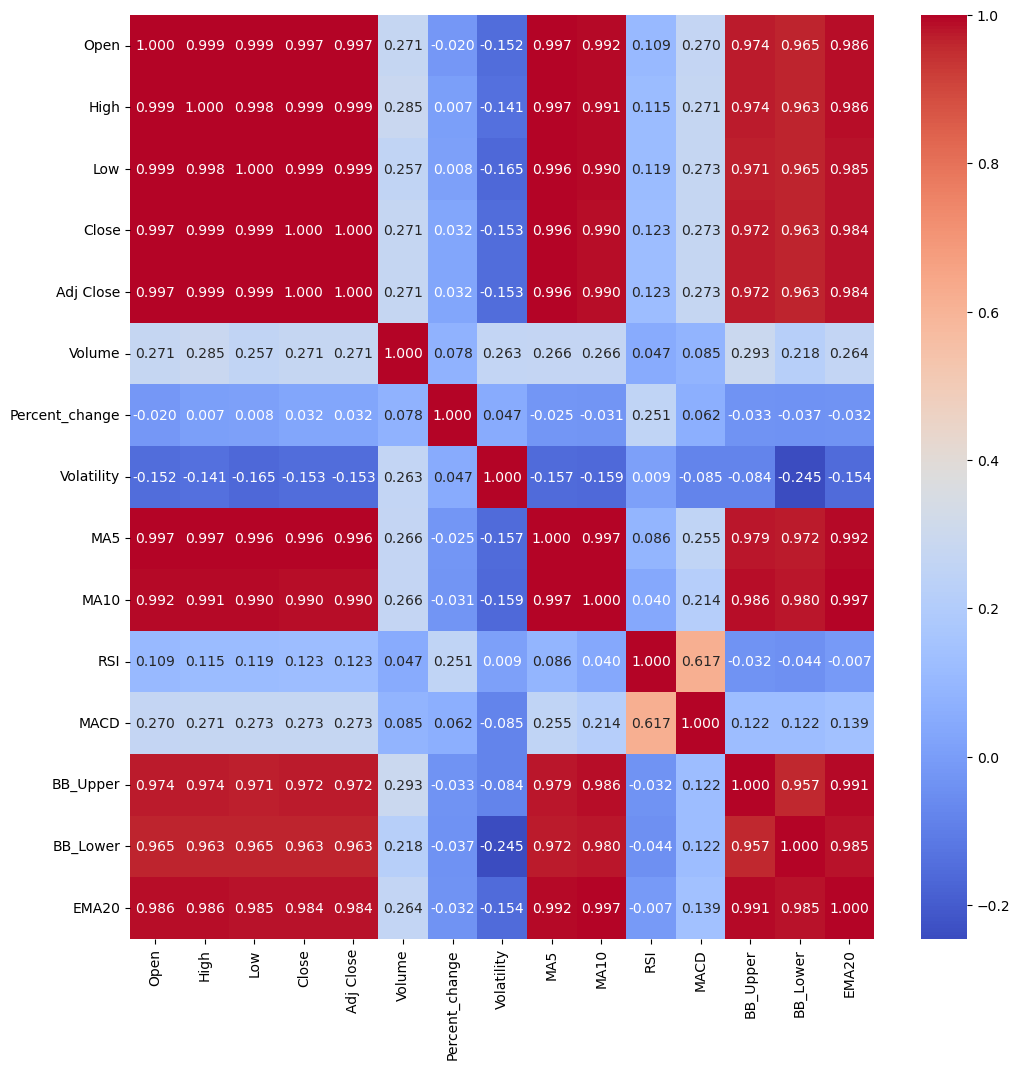

In [1044]:
#Make correlation matrix
corr_matrix = df_stock_re.corr()

#Plot matrix as heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

### Modeling
#### Linear Regression
##### Split data into training and test

In [1045]:
#Create Target-column with shift-function
df_stock_gas['Target'] = df_stock_gas['Close'].shift(-1)
df_stock_re['Target'] = df_stock_re['Close'].shift(-1)

#Delete last row as this is NaN
df_gas = df_stock_gas[:-1]
df_re = df_stock_re[:-1]

#Create StandardScaler
scaler_gas = StandardScaler()
scalre_re = StandardScaler()

#Define X and y
X_gas = df_gas[['MA10', 'MACD', 'RSI', 'BB_Upper', 'BB_Lower', 'EMA20']]
y_gas = df_gas["Target"]

X_re = df_re[['MA10', 'MACD', 'RSI', 'BB_Upper', 'BB_Lower', 'EMA20']]
y_re = df_re["Target"]

#Split into training and test
X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(X_gas, y_gas, test_size=0.2, shuffle=False, random_state=42)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_re, test_size=0.2, shuffle=False, random_state=42)

#Scale data
X_train_gas_scaled = scaler_gas.fit_transform(X_train_gas)
X_test_gas_scaled = scaler_gas.transform(X_test_gas)
X_train_re_scaled = scaler_re.fit_transform(X_train_re)
X_test_re_scaled = scaler_re.transform(X_test_re)

#Print shape of train and test
print(X_train_gas_scaled.shape)
print(y_train_gas.shape)
print(X_test_gas_scaled.shape)
print(y_test_gas.shape)

print(X_train_re_scaled.shape)
print(y_train_re.shape)
print(X_test_re_scaled.shape)
print(y_test_re.shape)

(3079, 6)
(3079,)
(770, 6)
(770,)
(3079, 6)
(3079,)
(770, 6)
(770,)


#### Plot split

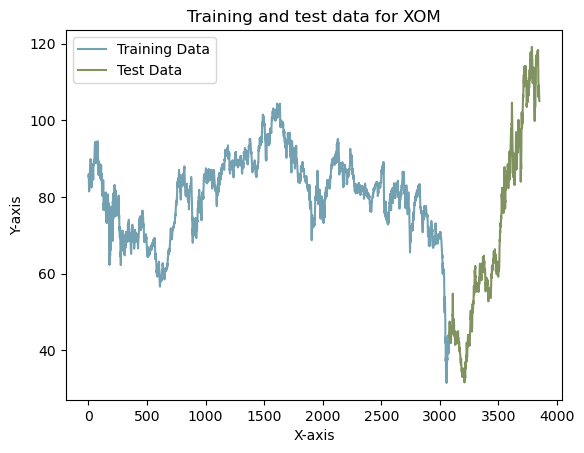

In [1046]:
#Split the dataset into same proportions as train_test_split
split_index = int(len(df_stock_gas) * 0.8)

train_data = df_stock_gas[:split_index]
test_data = df_stock_gas[split_index:]

#Plot the training and test data
plt.plot(train_data['Close'], color='#73A1B2', label='Training Data')
plt.plot(test_data['Close'], color='#809260', label='Test Data')
plt.title('Training and test data for XOM')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

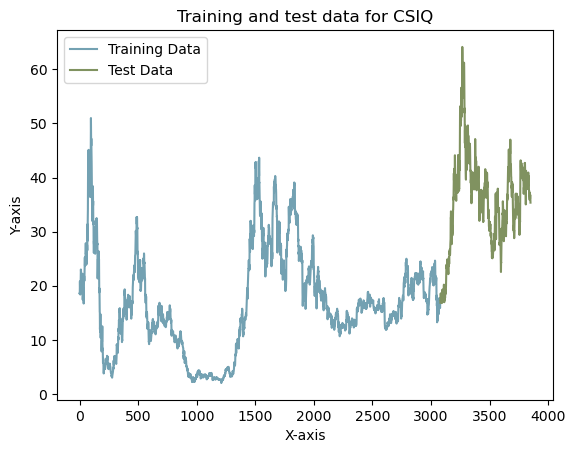

In [1047]:
#Split the dataset into same proportions as train_test_split
split_index = int(len(df_stock_re) * 0.8)

train_data = df_stock_re[:split_index]
test_data = df_stock_re[split_index:]

#Plot the training and test data
plt.plot(train_data['Close'], color='#73A1B2', label='Training Data')
plt.plot(test_data['Close'], color='#809260', label='Test Data')
plt.title('Training and test data for CSIQ')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

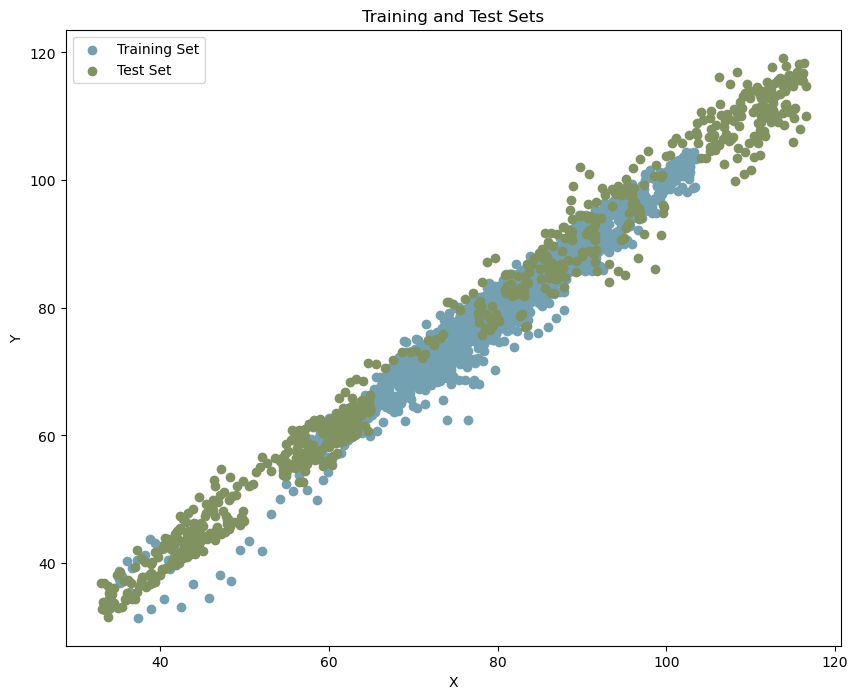

In [1048]:
fig = plt.figure(figsize=(10, 8))

#Plot both training and test sets into a scatterplot
plt.scatter(X_train_gas['MA10'], y_train_gas, color='#73A1B2', label='Training Set')
plt.scatter(X_test_gas['MA10'], y_test_gas, color='#809260', label='Test Set')

plt.title('Training and Test Sets')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

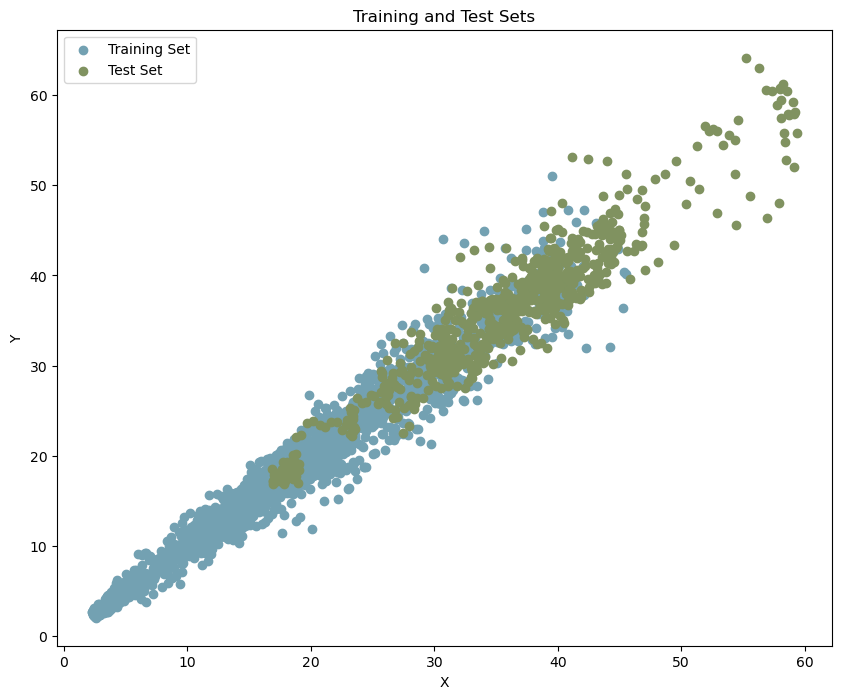

In [1049]:
fig = plt.figure(figsize=(10, 8))

#Plot both training and test sets into a scatterplot
plt.scatter(X_train_re['MA10'], y_train_re, color='#73A1B2', label='Training Set')
plt.scatter(X_test_re['MA10'], y_test_re, color='#809260', label='Test Set')

plt.title('Training and Test Sets')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [1050]:
#Make copy of df's with same data as test
df_gas_new = df_stock_gas.tail(len(y_test_gas)).copy()
df_re_new = df_stock_re.tail(len(y_test_re)).copy()


##### Grid search

In [1051]:
#Create Linear Regression object for both stocks
lr_gas = LinearRegression()
lr_re = LinearRegression()

#Define parameter for grid search
param_grid = {'fit_intercept': [True, False]}

#Perform grid search 
grid_search_gas = GridSearchCV(lr_gas, param_grid=param_grid, cv=5)
grid_search_gas.fit(X_train_gas_scaled, y_train_gas)

grid_search_re = GridSearchCV(lr_re, param_grid=param_grid, cv=5)
grid_search_re.fit(X_train_re_scaled, y_train_re)

#Get the best model and print results
lr_gas_best = grid_search_gas.best_estimator_
lr_re_best = grid_search_re.best_estimator_

print("Best parameters for gas model:")
print(grid_search_gas.best_params_)
print()

print("Best parameters for reactivity model:")
print(grid_search_re.best_params_)

Best parameters for gas model:
{'fit_intercept': True}

Best parameters for reactivity model:
{'fit_intercept': True}


##### Train model and predict

In [1053]:
random_state = 42

#Create Linear Regression object and train the model
lr_gas = LinearRegression(fit_intercept=True)
lr_gas.fit(X_train_gas_scaled, y_train_gas)

lr_re = LinearRegression(fit_intercept=True)
lr_re.fit(X_train_re_scaled, y_train_re)

#Print training score
print('Training Score Oil/Gas: ', lr_gas.score(X_train_gas_scaled, y_train_gas)) 
print('Training Score Renewable: ', lr_re.score(X_train_re_scaled, y_train_re)) 

#Predict on test set
y_pred_gas = lr_gas.predict(X_test_gas_scaled)
y_pred_re = lr_re.predict(X_test_re_scaled)

#Create a new column with the predicted values
df_gas_new['Pred_LR']=y_pred_gas
df_re_new['Pred_LR']=y_pred_re

#Function that calculates metrics 
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mape, r2

#Print error metrics 
mse, rmse, mape, r2 = calculate_metrics(y_test_gas, y_pred_gas)

print(f"""
Random Forest XOM Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}
""")


mse, rmse, mape, r2 = calculate_metrics(y_test_re, y_pred_re)

print(f"""
Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}
""")

Training Score Oil/Gas:  0.9837703353292793
Training Score Renewable:  0.9865520288215758

Random Forest XOM Metrics:
------------------------
Mean Squared Error:              3.925327227491026 
Root Mean Squared Error:         1.9812438586632959
Mean Absolute Percentage Error:  0.021226456016589214
R-squared Score:                 0.9939951617760028


Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              3.394976933634249 
Root Mean Squared Error:         1.8425463179074357
Mean Absolute Percentage Error:  0.03718969492297153
R-squared Score:                 0.9527633217822057



#### Support Vector Regressor
##### Grid search

In [1054]:
#Define parameter for grid search
param_grid = {'gamma': ['scale', 'auto'],
             'kernel': ['linear', 'rbf', 'poly']}

#Create SVR object for both stocks
svr_gas = SVR()
svr_re = SVR()

#Perform grid search
grid_search_gas = GridSearchCV(svr_gas, param_grid=param_grid, cv=5)
grid_search_gas.fit(X_train_gas_scaled, y_train_gas)

grid_search_re = GridSearchCV(svr_re, param_grid=param_grid, cv=5)
grid_search_re.fit(X_train_re_scaled, y_train_re)

#Get the best SVR model and print results
svr_best_gas = grid_search_gas.best_estimator_
svr_best_re = grid_search_re.best_estimator_

print('Gas: ', grid_search_gas.best_params_)
print('Re: ', grid_search_re.best_params_)


Gas:  {'gamma': 'scale', 'kernel': 'linear'}
Re:  {'gamma': 'scale', 'kernel': 'linear'}


##### Train model and predict

In [1055]:
random_state=42

#Create SVR object and train the model
svm_gas = SVR(C=60, kernel='linear', gamma='scale')
svm_gas.fit(X_train_gas_scaled, y_train_gas)

svm_re = SVR(C=60, kernel='linear', gamma='scale')
svm_re.fit(X_train_re_scaled, y_train_re)

#Print training score
print('Training Score Oil/Gas: ', svm_gas.score(X_train_gas_scaled, y_train_gas))
print('Training Score Re: ', svm_re.score(X_train_re_scaled, y_train_re))

#Predict on test set
y_pred_gas = svm_gas.predict(X_test_gas_scaled)
y_pred_re = svm_re.predict(X_test_re_scaled)

#Create new column with predicted values
df_gas_new['Pred_SVM']=y_pred_gas
df_re_new['Pred_SVM']=y_pred_re

#Print error metrics
mse, rmse, mape, r2 = calculate_metrics(y_test_gas, y_pred_gas)

print(f"""
Random Forest XOM Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")


mse, rmse, mape, r2 = calculate_metrics(y_test_re, y_pred_re)

print(f"""
Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")

Training Score Oil/Gas:  0.9835985247444331
Training Score Re:  0.9851091538885977

Random Forest XOM Metrics:
------------------------
Mean Squared Error:              4.004091645339836 
Root Mean Squared Error:         2.001022649881764
Mean Absolute Percentage Error:  0.02151273549734242
R-squared Score:                 0.9938746705253175/n


Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              3.554952582868943 
Root Mean Squared Error:         1.8854581891065478
Mean Absolute Percentage Error:  0.038334307318651686
R-squared Score:                 0.9505374691731004/n



#### Random Forest
##### Split data into training and test

In [1056]:
#Split dataset into training and test
X_gas = df_gas[["MA5"]]
X_re = df_re[["MA5"]]

X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(X_gas, y_gas, test_size=0.2, shuffle=False, random_state=42)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_re, test_size=0.2, shuffle=False, random_state=42)

##### Grid search

In [1057]:
#Define parameter for grid search
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 
             'max_depth': [None, 5, 10, 15, 20], 
             'n_estimators': [25, 50, 100, 150, 200, 250]}

#Create random forest regressor object
rf_gas = RandomForestRegressor(random_state=42)
rf_re = RandomForestRegressor(random_state=42)

#Perform grid search
grid_search_gas = GridSearchCV(rf_gas, param_grid=param_grid, cv=5)
grid_search_re = GridSearchCV(rf_re, param_grid=param_grid, cv=5)

grid_search_gas.fit(X_train_gas, y_train_gas)
grid_search_re.fit(X_train_re, y_train_re)

#Get the best random forest model
rf_best_gas = grid_search_gas.best_estimator_
rf_best_re = grid_search_re.best_estimator_

print(grid_search_gas.best_params_)
print(grid_search_re.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 250}


##### Train model and predict

In [1058]:
#Create Random Forest Regressor object and train the model
rf_gas = RandomForestRegressor(n_estimators=200, max_features= 'auto', max_depth= 10)
rf_gas.fit(X_train_gas, y_train_gas)

rf_re = RandomForestRegressor(n_estimators=250, max_features= 'auto', max_depth= 10)
rf_re.fit(X_train_re, y_train_re)

#Print training score
print('Training Score Oil/Gas: ', rf_gas.score(X_train_gas, y_train_gas)) 
print('Training Score Renewable: ', rf_re.score(X_train_re, y_train_re)) 

#Predict on test set
y_pred_gas = rf_gas.predict(X_test_gas)
y_pred_re = rf_re.predict(X_test_re)

#Create new column with predicted values
df_gas_new['Pred_RF']=y_pred_gas
df_re_new['Pred_RF']=y_pred_re

#Print error metrics
mse, rmse, mape, r2 = calculate_metrics(y_test_gas, y_pred_gas)

print(f"""
Random Forest XOM Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")


mse, rmse, mape, r2 = calculate_metrics(y_test_re, y_pred_re)

print(f"""
Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")

Training Score Oil/Gas:  0.9885641836558449
Training Score Renewable:  0.9909250646122117

Random Forest XOM Metrics:
------------------------
Mean Squared Error:              23.54983414583313 
Root Mean Squared Error:         4.852817135008606
Mean Absolute Percentage Error:  0.05265062159437826
R-squared Score:                 0.9639742278663272/n


Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              11.996671331412449 
Root Mean Squared Error:         3.4636211298888404
Mean Absolute Percentage Error:  0.058492792156880635
R-squared Score:                 0.8330819577145269/n



#### Decision Tree Regressor
##### Grid search

In [1059]:
#Create Decision Tree Regressor object
dt_gas = DecisionTreeRegressor(random_state=42)
dt_re = DecisionTreeRegressor(random_state=42)

#Define the parameters
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12], 
             'max_features': ['auto', 'sqrt', 'log2', None],
             'min_samples_leaf': [1, 2, 4, 8, 10],
             'min_samples_split': [2, 4, 6, 8, 10]}

#Perform grid search
grid_search_gas = GridSearchCV(estimator=dt_gas, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_re = GridSearchCV(estimator=dt_re, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_gas.fit(X_train_gas, y_train_gas)
grid_search_re.fit(X_train_re, y_train_re)

#Print best parameters
print("Best parameters Gas: ", grid_search_gas.best_params_)
print("Best score Gas: ", grid_search_gas.best_score_)
print("Best parameters Re: ", grid_search_re.best_params_)
print("Best score Re: ", grid_search_re.best_score_)


Best parameters Gas:  {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score Gas:  -8.489181704225896
Best parameters Re:  {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score Re:  -1.9625646485055832


##### Train model and predict

In [1060]:
random_state = 42

#Create Decition Tree Regressor object and train the model
dt_gas = DecisionTreeRegressor(max_depth= 6, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 2)
dt_gas.fit(X_train_gas, y_train_gas)
 
dt_re = DecisionTreeRegressor(max_depth= 6, max_features= 'auto', min_samples_leaf= 10, min_samples_split= 2)
dt_re.fit(X_train_re, y_train_re)

#Print training score
print('Training Score Oil/Gas: ', dt_gas.score(X_train_gas, y_train_gas))
print('Training Score Renewable: ', dt_re.score(X_train_re, y_train_re)) 

#Predict on test set
y_pred_gas = dt_gas.predict(X_test_gas)
y_pred_re = dt_re.predict(X_test_re)

#Create new column with predicted values
df_gas_new['Pred_DT']=y_pred_gas
df_re_new['Pred_DT']=y_pred_re

#Print error metrics
mse, rmse, mape, r2 = calculate_metrics(y_test_gas, y_pred_gas)

print(f"""
Random Forest XOM Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")


mse, rmse, mape, r2 = calculate_metrics(y_test_re, y_pred_re)

print(f"""
Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")

Training Score Oil/Gas:  0.9800944623984247
Training Score Renewable:  0.9819016947003867

Random Forest XOM Metrics:
------------------------
Mean Squared Error:              22.191986115983447 
Root Mean Squared Error:         4.710837092914957
Mean Absolute Percentage Error:  0.046562453771696634
R-squared Score:                 0.9660514197230765/n


Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              12.897510014585274 
Root Mean Squared Error:         3.591310347851502
Mean Absolute Percentage Error:  0.054040099256353544
R-squared Score:                 0.8205479618038022/n



#### LSTM
##### Split data into train and test

In [1061]:
#Split dataset into training and test set
X_gas = df_gas[['MA5', 'MACD', 'RSI', 'EMA20']]
X_re = df_re[['MA5', 'MACD', 'RSI', 'EMA20']]

X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(X_gas, y_gas, test_size=0.2, shuffle=False, random_state=42)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_re, test_size=0.2, shuffle=False, random_state=42)

#Create a MinMaxScaler object for each stock
scaler_gas = MinMaxScaler()
scaler_re = MinMaxScaler()

#Scale the training and test data
X_train_gas_scaled = scaler_gas.fit_transform(X_train_gas)
X_test_gas_scaled = scaler_gas.transform(X_test_gas)
X_train_re_scaled = scaler_re.fit_transform(X_train_re)
X_test_re_scaled = scaler_re.transform(X_test_re)

##### Grid search

In [1062]:
#Define LSTM model
def create_model(neurons=50, activation='sigmoid'):
    model = Sequential()
    model.add(LSTM(units=neurons, activation=activation, input_shape=(X_train_gas_scaled.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#Create KerasRegressor object
regressor_gas = KerasRegressor(build_fn=create_model, verbose=0)
regressor_re = KerasRegressor(build_fn=create_model, verbose=0)

#Define the hyperparameters
parameters = {
    'activation': ['sigmoid', 'relu'],
    'batch_size': [8, 16, 32, 64]
}

#Perform grid search
grid_search_gas = GridSearchCV(estimator=regressor_gas, param_grid=parameters, cv=5, n_jobs=-1)
grid_search_re = GridSearchCV(estimator=regressor_re, param_grid=parameters, cv=5, n_jobs=-1)

grid_search_gas.fit(X_train_gas_scaled, y_train_gas)
grid_search_re.fit(X_train_re_scaled, y_train_re)

#Print best parameters
print("Best parameters Gas: ", grid_search_gas.best_params_)
print("Best score Gas: ", grid_search_gas.best_score_)

print("Best parameters Re: ", grid_search_re.best_params_)
print("Best score Re: ", grid_search_re.best_score_)

Best parameters Gas:  {'activation': 'relu', 'batch_size': 8}
Best score Gas:  -16.776448249816895
Best parameters Re:  {'activation': 'relu', 'batch_size': 8}
Best score Re:  -12.934528017044068


##### Train model and predict 

In [1069]:
#Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=32, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#Create the LSTM and train model
lstm_gas = create_lstm_model((X_train_gas_scaled.shape[1], 1))
lstm_gas.fit(X_train_gas_scaled.reshape((X_train_gas_scaled.shape[0], X_train_gas_scaled.shape[1], 1)), y_train_gas, epochs=75, batch_size=8, verbose=0)

lstm_re = create_lstm_model((X_train_re_scaled.shape[1], 1))
lstm_re.fit(X_train_re_scaled.reshape((X_train_re_scaled.shape[0], X_train_re_scaled.shape[1], 1)), y_train_re, epochs=75, batch_size=8, verbose=0)

#Calculate training score
y_gas_train_pred = lstm_gas.predict(X_train_gas_scaled)
y_re_train_pred = lstm_re.predict(X_train_re_scaled)

#Calculate the R-squared score for the training set
r2_train_gas = r2_score(y_train_gas, y_gas_train_pred)
r2_train_re = r2_score(y_train_re, y_re_train_pred)

#Print training score
print('Training Score Oil/Gas: ', r2_train_gas)
print('Training Score Renewable: ', r2_train_re) 

#Predict on test set
y_pred_gas = lstm_gas.predict(X_test_gas_scaled).flatten()
y_pred_re = lstm_re.predict(X_test_re_scaled).flatten()

#Create new column with predicted values
df_gas_new['Pred_LSTM']=y_pred_gas
df_re_new['Pred_LSTM']=y_pred_re

#Print error metrics 
mse, rmse, mape, r2 = calculate_metrics(y_test_gas, y_pred_gas)

print(f"""
Random Forest XOM Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")


mse, rmse, mape, r2 = calculate_metrics(y_test_re, y_pred_re)

print(f"""
Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              {mse} 
Root Mean Squared Error:         {rmse}
Mean Absolute Percentage Error:  {mape}
R-squared Score:                 {r2}/n
""")

97/97 [==============================] - 0s 1ms/step
Training Score Oil/Gas:  0.9784960076103479
Training Score Renewable:  0.9832221751803998
25/25 [==============================] - 0s 1ms/step

Random Forest XOM Metrics:
------------------------
Mean Squared Error:              6.622718669407281 
Root Mean Squared Error:         2.5734643322586153
Mean Absolute Percentage Error:  0.03313050694787473
R-squared Score:                 0.9898687798728424/n


Random Forest CSIQ Metrics:
------------------------
Mean Squared Error:              4.445414709454237 
Root Mean Squared Error:         2.1084152127733846
Mean Absolute Percentage Error:  0.04135988265864434
R-squared Score:                 0.9381478495200398/n



### Results
#### Print dataset

In [1070]:
print(df_gas_new.tail())
print(df_re_new.tail())

           Date        Open        High         Low       Close   Adj Close  \
3845 2023-05-09  108.339996  110.230003  108.209999  109.139999  108.201096   
3846 2023-05-10  109.739998  110.010002  106.709999  107.739998  106.813141   
3847 2023-05-11  106.489998  106.820000  104.930000  105.790001  104.879921   
3848 2023-05-12  106.309998  107.010002  104.779999  105.779999  104.870003   
3849 2023-05-15  105.510002  105.930000  104.580002  105.070000  105.070000   

        Volume  Percent_change  Volatility         MA5  ...      MACD  \
3845  11370800        0.000275    0.018170  108.180000  ... -0.920517   
3846  14884800       -0.012828    0.018293  108.142000  ... -1.133715   
3847  17165900       -0.018099    0.018591  108.092000  ... -1.443386   
3848  12608300       -0.000095    0.018497  107.512000  ... -1.670354   
3849  13706200       -0.006712    0.017174  106.703999  ... -1.885781   

        BB_Upper    BB_Lower       EMA20      Target     Pred_LR    Pred_SVM  \
3845  

#### Plot

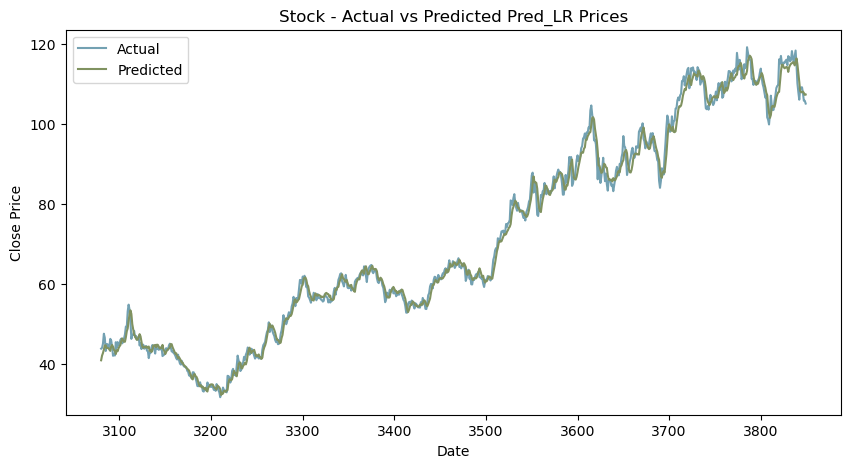

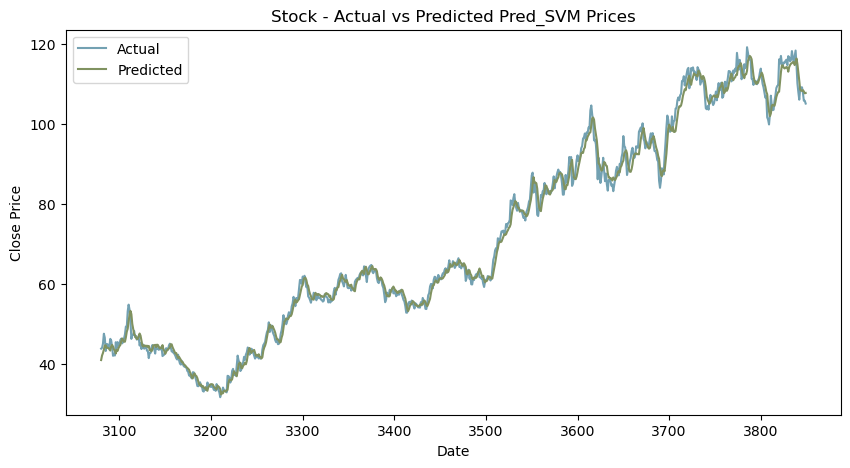

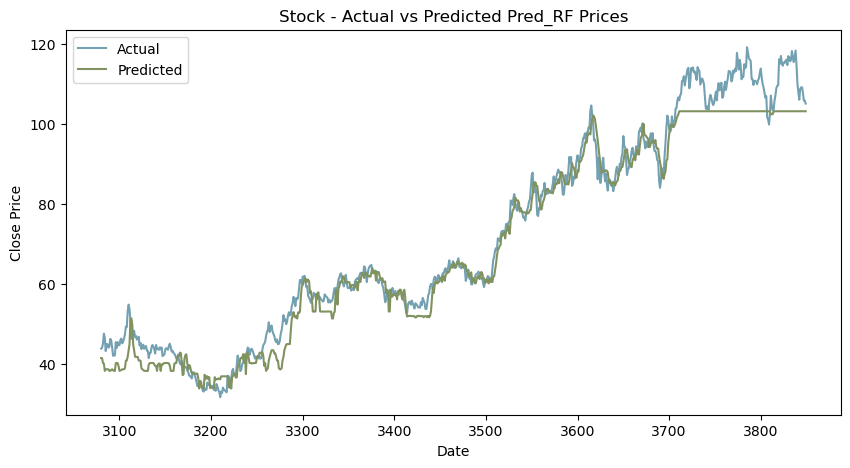

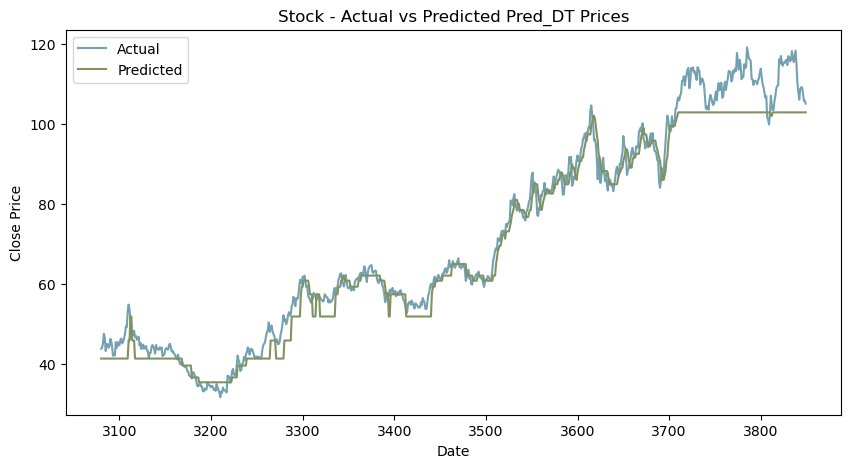

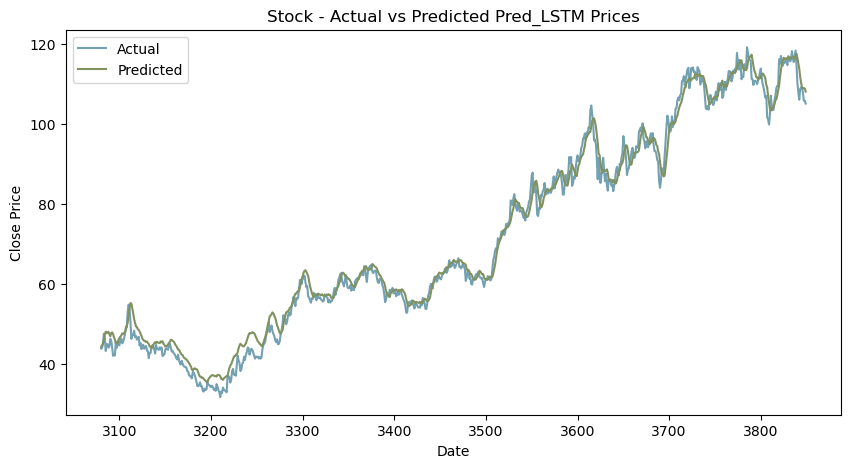

In [1082]:
#Function that plots actual vs predicted Close-price
def plot_actual_vs_predicted(df, column_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label='Actual', color='#73A1B2')
    plt.plot(df.index, df[f'{column_name}'], label='Predicted', color='#809260')
    plt.title(f'Stock - Actual vs Predicted {column_name} Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

#Plot the actual vs predicted Close_price by calling function
plot_actual_vs_predicted(df_gas_new, 'Pred_LR')
plot_actual_vs_predicted(df_gas_new, 'Pred_SVM')
plot_actual_vs_predicted(df_gas_new, 'Pred_RF')
plot_actual_vs_predicted(df_gas_new, 'Pred_DT')
plot_actual_vs_predicted(df_gas_new, 'Pred_LSTM')

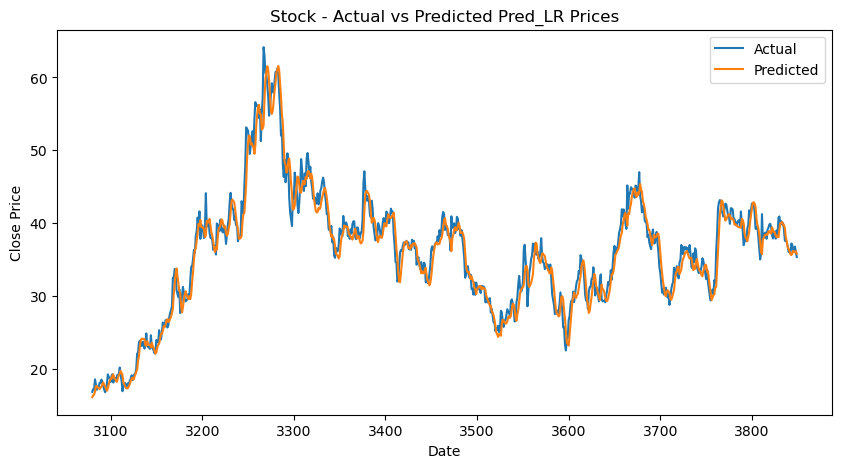

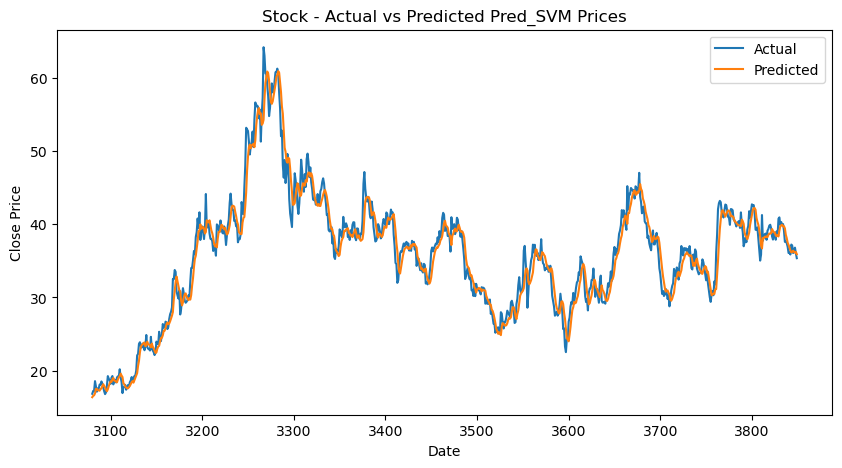

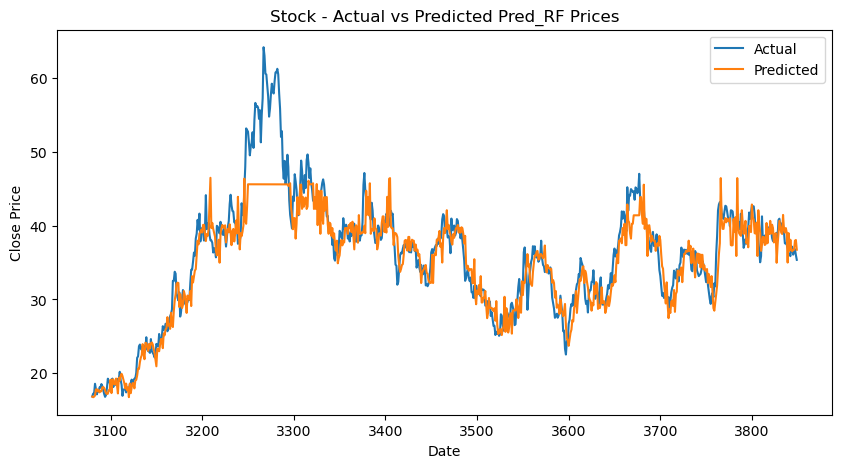

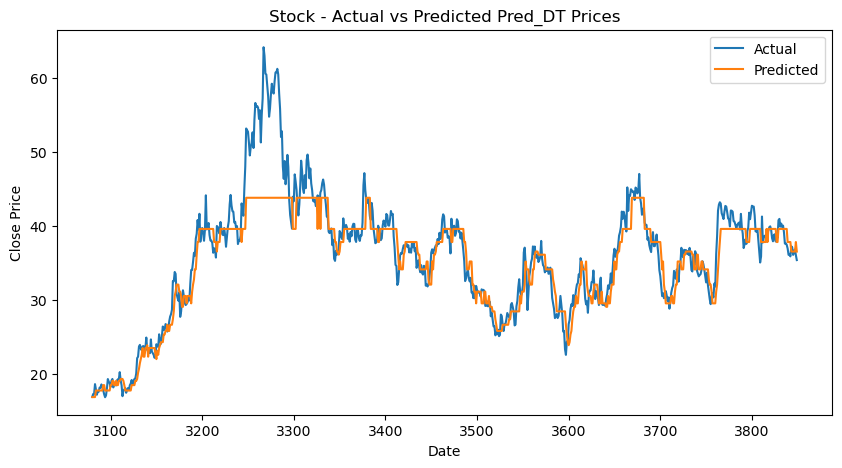

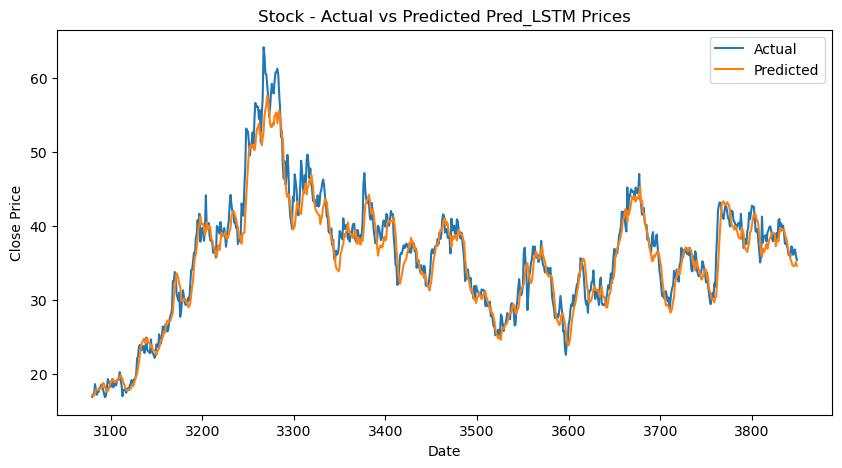

"plt.figure(figsize=(10, 5))\nplt.plot(df_re_new.index, df_re_new['Close'], label='Actual')\nplt.plot(df_re_new.index, df_re_new['Pred_LR'], label='Predicted')\nplt.title('Renewable Energy Stock - Actual vs Predicted LR Prices')\nplt.xlabel('Date')\nplt.ylabel('Close Price')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 5))\nplt.plot(df_re_new.index, df_re_new['Close'], label='Actual')\nplt.plot(df_re_new.index, df_re_new['Pred_SVM'], label='Predicted')\nplt.title('Renewable Energy Stock - Actual vs Predicted SVM Prices')\nplt.xlabel('Date')\nplt.ylabel('Close Price')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 5))\nplt.plot(df_re_new.index, df_re_new['Close'], label='Actual')\nplt.plot(df_re_new.index, df_re_new['Pred_RF'], label='Predicted')\nplt.title('Renewable Energy Stock - Actual vs Predicted RF Prices')\nplt.xlabel('Date')\nplt.ylabel('Close Price')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 5))\nplt.plot(df_re_new.index, df_re_new['Close'], label='Act

In [1080]:
#Plot the actual vs predicted Close_price by calling function
plot_actual_vs_predicted(df_re_new, 'Pred_LR')
plot_actual_vs_predicted(df_re_new, 'Pred_SVM')
plot_actual_vs_predicted(df_re_new, 'Pred_RF')
plot_actual_vs_predicted(df_re_new, 'Pred_DT')
plot_actual_vs_predicted(df_re_new, 'Pred_LSTM')

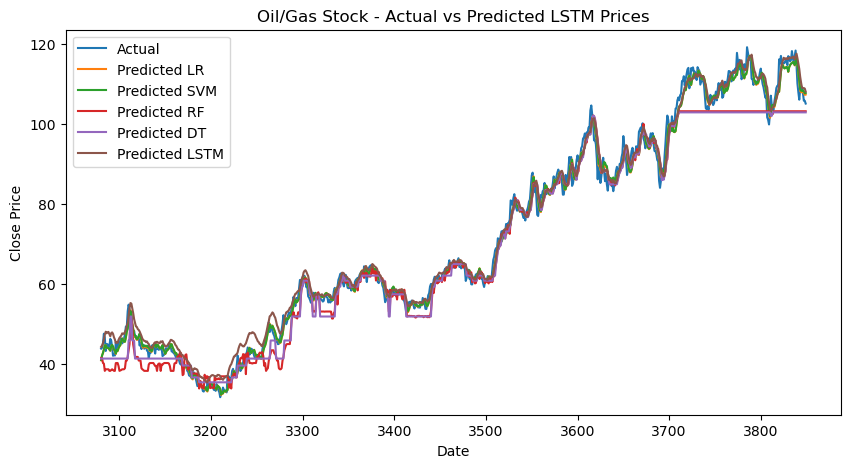

In [1073]:
#Plot all predicted Close-prices in same graph for camparison 
plt.figure(figsize=(10, 5))
plt.plot(df_gas_new.index, df_gas_new['Close'], label='Actual')
plt.plot(df_gas_new.index, df_gas_new['Pred_LR'], label='Predicted LR')
plt.plot(df_gas_new.index, df_gas_new['Pred_SVM'], label='Predicted SVM')
plt.plot(df_gas_new.index, df_gas_new['Pred_RF'], label='Predicted RF')
plt.plot(df_gas_new.index, df_gas_new['Pred_DT'], label='Predicted DT')
plt.plot(df_gas_new.index, df_gas_new['Pred_LSTM'], label='Predicted LSTM')
plt.title('Oil/Gas Stock - Actual vs Predicted LSTM Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

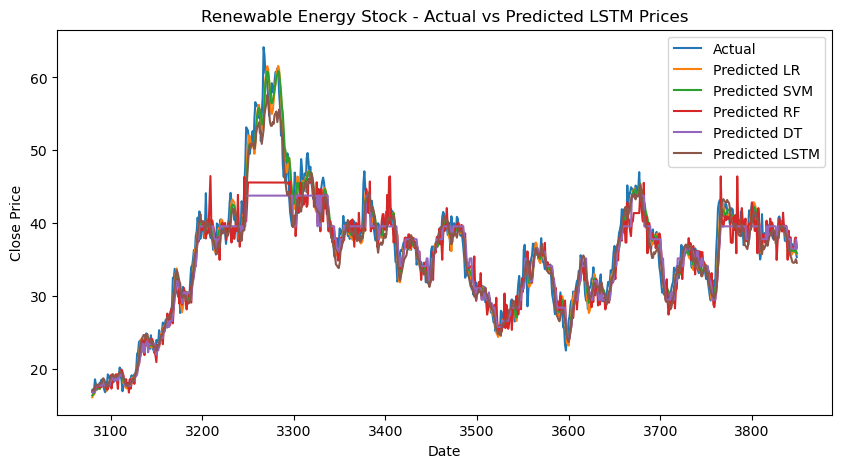

In [1074]:
#Plot all predicted Close-prices in same graph for camparison 
plt.figure(figsize=(10, 5))
plt.plot(df_re_new.index, df_re_new['Close'], label='Actual')
plt.plot(df_re_new.index, df_re_new['Pred_LR'], label='Predicted LR')
plt.plot(df_re_new.index, df_re_new['Pred_SVM'], label='Predicted SVM')
plt.plot(df_re_new.index, df_re_new['Pred_RF'], label='Predicted RF')
plt.plot(df_re_new.index, df_re_new['Pred_DT'], label='Predicted DT')
plt.plot(df_re_new.index, df_re_new['Pred_LSTM'], label='Predicted LSTM')
plt.title('Renewable Energy Stock - Actual vs Predicted LSTM Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [1081]:
#Print last row of each dataset
print(df_gas_new.tail(1))
print(df_re_new.tail(1))

           Date        Open    High         Low   Close  Adj Close    Volume  \
3849 2023-05-15  105.510002  105.93  104.580002  105.07     105.07  13706200   

      Percent_change  Volatility         MA5  ...      MACD    BB_Upper  \
3849       -0.006712    0.017174  106.703999  ... -1.885781  121.681568   

        BB_Lower       EMA20  Target     Pred_LR    Pred_SVM     Pred_RF  \
3849  102.373431  110.067844     NaN  107.326598  107.718222  103.143795   

      Pred_DT   Pred_LSTM  
3849  102.865  108.058121  

[1 rows x 22 columns]
           Date   Open       High        Low      Close  Adj Close   Volume  \
3849 2023-05-15  36.16  36.310001  34.759998  35.360001  35.360001  1910500   

      Percent_change  Volatility    MA5  ...      MACD   BB_Upper   BB_Lower  \
3849        -0.01805    0.019104  36.16  ... -0.809581  41.093661  34.190339   

          EMA20  Target    Pred_LR   Pred_SVM    Pred_RF    Pred_DT  Pred_LSTM  
3849  37.181431     NaN  35.802662  35.909578  36.73463

In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def time_series_cross_validation(X, y, model=None, n_splits=5, verbose=0):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mse_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

        model = create_lstm_model((1, X_train.shape[2]))
        model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=verbose)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores)


models = [
    (lr_gas, "Linear Regression 1"),
    (lr_re, "Linear Regression 2"),
    (svm_gas, "SVM 1"),
    (svm_re, "SVM 2"),
    (dt_gas, "Decision Tree 1"),
    (dt_re, "Decision Tree 2"),
    (rf_gas, "Random Forest 1"),
    (rf_re, "Random Forest 2"),
    (lstm_gas, "LSTM 1", "lstm"),
    (lstm_re, "LSTM 2", "lstm")
]

from sklearn.model_selection import cross_val_score

def cross_val_evaluate_model(model, X, y, model_name, n_folds=5, model_type='sklearn'):
    if model_type == 'lstm':
        avg_mse = time_series_cross_validation(np.array(X), np.array(y), n_splits=n_folds)
        print(f"{model_name} Cross-Validation Metrics:")
        print(f"Mean Squared Error: {avg_mse}\n")
        return

    mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=n_folds)
    rmse_scores = np.sqrt(mse_scores)
    mae_scores = -cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=n_folds)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=n_folds)

    print(f"{model_name} Cross-Validation Metrics:")
    print(f"Mean Squared Error: {np.mean(mse_scores)}")
    print(f"Root Mean Squared Error: {np.mean(rmse_scores)}")
    print(f"Mean Absolute Error: {np.mean(mae_scores)}")
    print(f"R-squared Score: {np.mean(r2_scores)}\n")
    
for model, model_name, *model_type in models:
    X, y = (X_train_gas, y_train_gas) if "1" in model_name else (X_train_re, y_train_re)
    if model_type and model_type[0] == "lstm":
        cross_val_evaluate_model(model, X, y, model_name, model_type='lstm')
    else:
        cross_val_evaluate_model(model, X, y, model_name)

Linear Regression 1 Cross-Validation Metrics:
Mean Squared Error: 2.4089851865243928
Root Mean Squared Error: 1.531904863743037
Mean Absolute Error: 1.1236902383519507
R-squared Score: 0.9508383080151089

Linear Regression 2 Cross-Validation Metrics:
Mean Squared Error: 1.597911732771833
Root Mean Squared Error: 1.1676470505548648
Mean Absolute Error: 0.8222044831619855
R-squared Score: 0.9643047151163643

SVM 1 Cross-Validation Metrics:
Mean Squared Error: 41.80024171963006
Root Mean Squared Error: 4.939564905792727
Mean Absolute Error: 2.622311123769253
R-squared Score: -0.08782449940954162

SVM 2 Cross-Validation Metrics:
Mean Squared Error: 2.1181239340885636
Root Mean Squared Error: 1.3257570591976022
Mean Absolute Error: 0.9085756743403876
R-squared Score: 0.9567430193501967

Decision Tree 1 Cross-Validation Metrics:
Mean Squared Error: 11.405773230019571
Root Mean Squared Error: 3.201546095917146
Mean Absolute Error: 2.21288432175551
R-squared Score: 0.7674145721141559

Decision

2023-05-10 10:20:38.042827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:20:38.044148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:20:38.045356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:21:13.199258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:21:13.200314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:21:13.201564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:22:24.115800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:22:24.116856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:22:24.118131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:24:09.003171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:24:09.004295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:24:09.005564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:26:25.331327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:26:25.332660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:26:25.333968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 1s 4ms/step
LSTM 1 Cross-Validation Metrics:
Mean Squared Error: 5.311900697366786



2023-05-10 10:29:16.420952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:29:16.422378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:29:16.423432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:29:51.116134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:29:51.117196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:29:51.118528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:31:01.618557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:31:01.619635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:31:01.620870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 2ms/step


2023-05-10 10:33:25.999053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:33:26.001327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:33:26.002496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step


2023-05-10 10:35:52.537860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:35:52.538916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:35:52.540275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 1ms/step
LSTM 2 Cross-Validation Metrics:
Mean Squared Error: 1.814420975298633



2023-05-10 10:38:44.833981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 10:38:44.835483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 10:38:44.836555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [52]:
gas_pred = svm_gas.predict(X_test_gas)
re_pred = svm_re.predict(X_test_re)

new_df_gas = df_stock_gas.tail(769)
new_df_re = df_stock_re.tail(769)

new_df_gas['Predicted_Close'] = gas_pred
new_df_re['Predicted_Close'] = re_pred

print(new_df_gas.head())

           Date       Open       High        Low      Close  Adj Close  \
3075 2020-04-17  39.880001  43.320000  39.869999  43.220001  36.506138   
3076 2020-04-20  40.750000  42.740002  40.540001  41.180000  34.783031   
3077 2020-04-21  40.400002  42.130001  39.630001  40.959999  34.597210   
3078 2020-04-22  42.599998  42.930000  41.860001  42.130001  35.585453   
3079 2020-04-23  43.130001  44.660000  42.810001  43.450001  36.700401   

        Volume  Percent Change        MA5    MA10  ...        RSI      MACD  \
3075  40829100        0.103959  41.608000  41.594  ...  66.561012 -0.677773   
3076  39260800       -0.047200  41.292001  41.791  ...  59.010772 -0.612649   
3077  44381600       -0.005342  40.998000  41.840  ...  57.411991 -0.572195   
3078  27074200        0.028565  41.328001  41.929  ...  61.004787 -0.440646   
3079  35271000        0.031332  42.188000  41.889  ...  57.881134 -0.227259   

      MACD_Signal  MACD_Hist   BB_Upper  BB_Middle   BB_Lower      EMA20  \
3075

/var/folders/6c/xrq6nr993dbf_23xd2745l6h0000gn/T/ipykernel_6890/408547933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_gas['Predicted_Close'] = gas_pred
/var/folders/6c/xrq6nr993dbf_23xd2745l6h0000gn/T/ipykernel_6890/408547933.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_re['Predicted_Close'] = re_pred


In [74]:
#####


##Making R^2 scores
##R^2-score er en statistikk som gir noen informasjon om godheten til en modell. Den representerer andelen av variansen for et avhengig variabel som er forklart av en uavhengig variabel eller variabler i en regresjonsmodell. For eksempel, hvis R^2 er 0.8, betyr det at 80% av variansen i avhengig variabel kan forklares av uavhengige variabler.
##I denne sammenhengen gir lasso_train_score deg en indikasjon på hvor godt modellen passer til treningsdataene, mens lasso_test_score gir deg en indikasjon på hvor godt modellen forutsier testdataene. Ideelt sett vil du ha begge disse tallene så nærme 1 som mulig, noe som ville bety at modellen forklarer en stor del av variansen i dataene.


def calculate_r2_scores(model, X_train, y_train, X_test, y_test):
    # Predict the values for the training set
    train_preds = model.predict(X_train)
    # Calculate the R^2 score for the training set
    train_score = r2_score(y_train, train_preds)

    # Predict the values for the test set
    test_preds = model.predict(X_test)
    # Calculate the R^2 score for the test set
    test_score = r2_score(y_test, test_preds)
    
    return train_score, test_score



# For the first linear regression model (lr_gas)
train_score_gas, test_score_gas = calculate_r2_scores(lr_gas, X_train_gas, y_train_gas, X_test_gas, y_test_gas)

# For the second linear regression model (lr_re)
train_score_re, test_score_re = calculate_r2_scores(lr_re, X_train_re, y_train_re, X_test_re, y_test_re)

# Print the scores
print("Linear Regression XOM:")
print(f"Training score: {round(train_score_gas, 4)}")
print(f"Testing score: {round(test_score_gas, 4)}")

print("\nLinear Regression CISQ:")
print(f"Training score: {round(train_score_re, 4)}")
print(f"Testing score: {round(test_score_re, 4)}")

Linear Regression XOM:
Training score: 0.9837
Testing score: 0.994

Linear Regression CISQ:
Training score: 0.9866
Testing score: 0.9533


In [30]:
####

from sklearn.ensemble import RandomForestRegressor

def train_and_score_RF(X_train, y_train, X_test, y_test):
    # Create and train a Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Use the calculate_r2_scores function to get training and testing scores
    train_score, test_score = calculate_r2_scores(model, X_train, y_train, X_test, y_test)

    # Return the model and the scores
    return model, train_score, test_score

#XOM
rf_gas, train_score_gas, test_score_gas = train_and_score_RF(X_train_gas, y_train_gas, X_test_gas, y_test_gas)

#CSIQ
rf_re, train_score_re, test_score_re = train_and_score_RF(X_train_re, y_train_re, X_test_re, y_test_re)

# Print the scores
print("Random Forest Regression XOM:")
print(f"Training score: {round(train_score_gas, 4)}")
print(f"Testing score: {round(test_score_gas, 4)}")

print("\nRandom Forest Regression CSIQ:")
print(f"Training score: {round(train_score_re, 4)}")
print(f"Testing score: {round(test_score_re, 4)}")

Random Forest Regression XOM:
Training score: 0.9976
Testing score: 0.9435

Random Forest Regression CSIQ:
Training score: 0.9982
Testing score: 0.6536


In [32]:
from sklearn.tree import DecisionTreeRegressor

def train_and_score_DT(X_train, y_train, X_test, y_test):
    # Create and train a Decision Tree model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Use the calculate_r2_scores function to get training and testing scores
    train_score, test_score = calculate_r2_scores(model, X_train, y_train, X_test, y_test)

    # Return the model and the scores
    return model, train_score, test_score

# For the first dataset (gas)
dt_gas, dt_train_score_gas, dt_test_score_gas = train_and_score_DT(X_train_gas, y_train_gas, X_test_gas, y_test_gas)

# For the second dataset (re)
dt_re, dt_train_score_re, dt_test_score_re = train_and_score_DT(X_train_re, y_train_re, X_test_re, y_test_re)

# Print the scores
print("Decision Tree Regression XOM:")
print(f"Training score: {round(dt_train_score_gas, 4)}")
print(f"Testing score: {round(dt_test_score_gas, 4)}")

print("\nDecision Tree Regression CSIQ:")
print(f"Training score: {round(dt_train_score_re, 4)}")
print(f"Testing score: {round(dt_test_score_re, 4)}")

Decision Tree Regression 1:
Training score: 1.0
Testing score: 0.9249

Decision Tree Regression 2:
Training score: 1.0
Testing score: 0.4866


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

def train_and_score_LSTM(X_train, y_train, X_test, y_test, epochs=50):
    # Reshape input to be 3D [samples, timesteps, features]
    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Use the model to make predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate the R^2 scores
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)

    return model, train_score, test_score

# For the first dataset (gas)
lstm_gas, lstm_train_score_gas, lstm_test_score_gas = train_and_score_LSTM(X_train_gas, y_train_gas, X_test_gas, y_test_gas)

# For the second dataset (re)
lstm_re, lstm_train_score_re, lstm_test_score_re = train_and_score_LSTM(X_train_re, y_train_re, X_test_re, y_test_re)

# Print the scores
print("LSTM Regression 1:")
print(f"Training score: {round(lstm_train_score_gas, 4)}")
print(f"Testing score: {round(lstm_test_score_gas, 4)}")

print("\nLSTM Regression 2:")
print(f"Training score: {round(lstm_train_score_re, 4)}")
print(f"Testing score: {round(lstm_test_score_re, 4)}")

NameError: name 'model' is not defined

In [40]:
print(dt_re.score(X_train_re, y_train_re))
print(dt_re.score(X_test_re, y_test_re))

1.0
0.4866309270813074


In [76]:
# comparing results
print(f"""
Model                       Train Score        Test Score        T-T Gap
-----                       -----------        ----------        -------
Linear Regression XOM:      {round(train_score_gas, 4)}          {round(test_score_gas, 4)}           {round(train_score_gas - test_score_gas, 4)}
Linear Regression CISQ:     {round(train_score_re, 4)}          {round(test_score_re, 4)}           {round(train_score_re - test_score_re, 4)}
Random Forest Regression XOM:    {round(train_score_gas, 4)}          {round(test_score_gas, 4)}           {round(train_score_gas - test_score_gas, 4)}
Random Forest Regression CSIQ:   {round(train_score_re, 4)}          {round(test_score_re, 4)}           {round(train_score_re - test_score_re, 4)}
Decision Tree Regression XOM:    {round(dt_train_score_gas, 4)}          {round(dt_test_score_gas, 4)}           {round(dt_train_score_gas - dt_test_score_gas, 4)}
Decision Tree Regression CSIQ:   {round(dt_train_score_re, 4)}          {round(dt_test_score_re, 4)}           {round(dt_train_score_re - dt_test_score_re, 4)}
""")



Model                       Train Score        Test Score        T-T Gap
-----                       -----------        ----------        -------
Linear Regression XOM:       0.9837          0.994           -0.0103
Linear Regression CISQ:      0.9866          0.9533           0.0332
Random Forest XOM:    0.9837          0.994           -0.0103
Random Forest CSIQ:   0.9866          0.9533           0.0332
Decision Tree XOM:    1.0          0.9249           0.0751
Decision Tree  CSIQ:   1.0          0.4866           0.5134



In [ ]:

"""plt.figure(figsize=(10, 5))
plt.plot(df_gas_new.index, df_gas_new['Close'], label='Actual')
plt.plot(df_gas_new.index, df_gas_new['Pred_LR'], label='Predicted')
plt.title('Oil/Gas Stock - Actual vs Predicted LR Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_gas_new.index, df_gas_new['Close'], label='Actual')
plt.plot(df_gas_new.index, df_gas_new['Pred_SVM'], label='Predicted')
plt.title('Oil/Gas Stock - Actual vs Predicted SVM Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_gas_new.index, df_gas_new['Close'], label='Actual')
plt.plot(df_gas_new.index, df_gas_new['Pred_RF'], label='Predicted')
plt.title('Oil/Gas Stock - Actual vs Predicted RF Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_gas_new.index, df_gas_new['Close'], label='Actual')
plt.plot(df_gas_new.index, df_gas_new['Pred_DT'], label='Predicted')
plt.title('Oil/Gas Stock - Actual vs Predicted DT Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_gas_new.index, df_gas_new['Close'], label='Actual')
plt.plot(df_gas_new.index, df_gas_new['Pred_LSTM'], label='Predicted')
plt.title('Oil/Gas Stock - Actual vs Predicted LSTM Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()"""